# This file serve as making the whole process test runs with class

In [1]:
import sys
import os

# Get the parent directory of the notebook
project_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

# Add the project directory to the Python path
sys.path.append(project_path)

# Now you can import the class
from classes.pdf_parser import JoradpFileParse
from classes.ocr_processor import OcrProcessor
from classes.image_builder import ImageBuilder

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
parserImages = JoradpFileParse("../data_test/F2024080.pdf")
ocr = OcrProcessor()

Loaded layout model datalab-to/surya_layout0 on device cpu with dtype torch.float32
Loaded detection model vikp/surya_det3 on device cpu with dtype torch.float32
Loaded recognition model vikp/surya_rec2 on device cpu with dtype torch.float32


In [3]:
parserImages.get_images()

In [4]:
parserImages.resize_image_to_fit_ocr()

In [5]:
parserImages.crop_all_images(top=120, left=80, right=80, bottom=100)

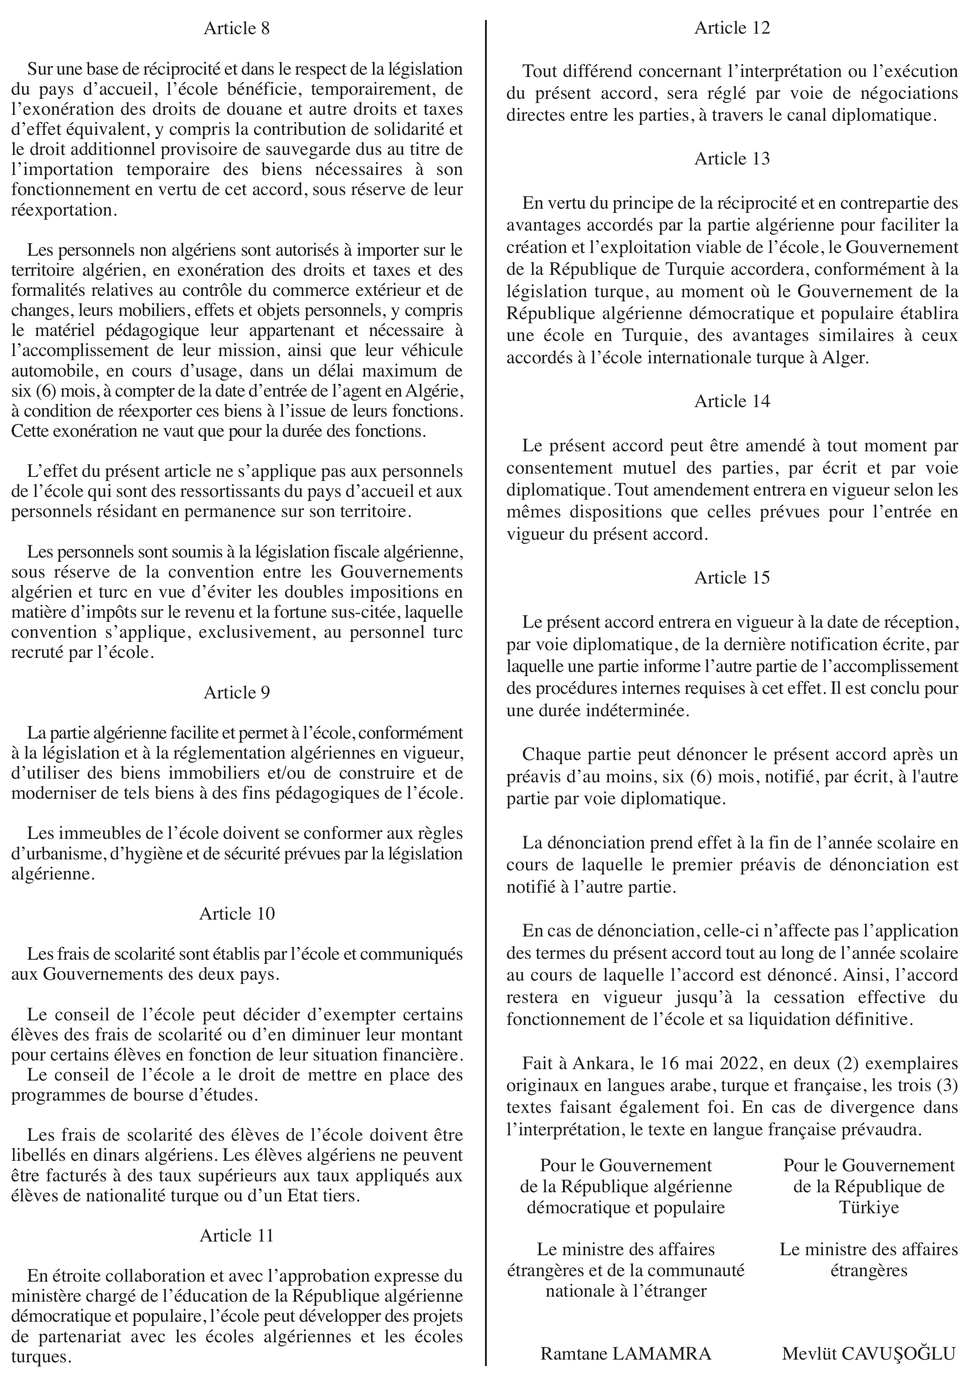

In [6]:
parserImages.images[5]

In [7]:
layouts = ocr.run_layout_order_detection(parserImages.images[5])

Recognizing layout: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.85s/it]


In [8]:
 [[int(layout_box.bbox[0]), int(layout_box.bbox[1]), int(layout_box.bbox[2]), int(layout_box.bbox[3])] for layout_box in layouts]

[[206, 20, 275, 37],
 [10, 61, 467, 221],
 [10, 240, 466, 440],
 [9, 461, 464, 519],
 [9, 541, 465, 661],
 [201, 684, 270, 702],
 [10, 724, 467, 805],
 [9, 825, 466, 883],
 [198, 904, 277, 922],
 [9, 944, 465, 980],
 [8, 1007, 465, 1065],
 [7, 1071, 467, 1106],
 [8, 1127, 465, 1204],
 [202, 1230, 277, 1245],
 [9, 1268, 465, 1366],
 [695, 20, 775, 35],
 [504, 63, 962, 122],
 [693, 152, 771, 168],
 [504, 194, 962, 368],
 [692, 392, 771, 410],
 [505, 437, 961, 544],
 [690, 569, 771, 587],
 [506, 612, 963, 719],
 [507, 745, 963, 808],
 [507, 833, 963, 895],
 [505, 921, 962, 1028],
 [504, 1053, 961, 1138],
 [511, 1156, 959, 1285],
 [543, 1339, 712, 1356],
 [779, 1344, 957, 1360]]

In [9]:
detected_textes = ocr.run_text_recognition_fr(parserImages.images[5], layouts)

Recognizing Text: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [01:21<00:00, 82.00s/it]


In [10]:
detected_textes

[TextLine(polygon=[[206.0, 20.0], [275.0, 20.0], [273.0, 37.0], [204.0, 37.0]], confidence=None, text='Article 8', bbox=[206.0, 20.0, 275.0, 37.0]),
 TextLine(polygon=[[10.0, 61.0], [467.0, 61.0], [467.0, 221.0], [10.0, 221.0]], confidence=None, text='   ', bbox=[10.0, 61.0, 467.0, 221.0]),
 TextLine(polygon=[[10.0, 240.0], [466.0, 240.0], [466.0, 440.0], [10.0, 440.0]], confidence=None, text='', bbox=[10.0, 240.0, 466.0, 440.0]),
 TextLine(polygon=[[9.0, 461.0], [464.0, 459.0], [464.0, 519.0], [9.0, 522.0]], confidence=None, text="    L'effet du présent article ne s’applique pas aux personnels\nde l’école qui sont des ressortissants du pays d’accueil et aux\npersonnels résidant en permanence sur son ter", bbox=[9.0, 461.0, 464.0, 519.0]),
 TextLine(polygon=[[9.0, 541.0], [465.0, 541.0], [465.0, 661.0], [9.0, 661.0]], confidence=None, text="     Les personnels sont soumis à la législation fiscale algérienne,\n algérien d'i mure en vue d'égislation fiscale algérienne,\n algérien d'i mur

In [11]:
imageTest = ImageBuilder(image=parserImages.images[5], layout_data=layouts, text_data=detected_textes)

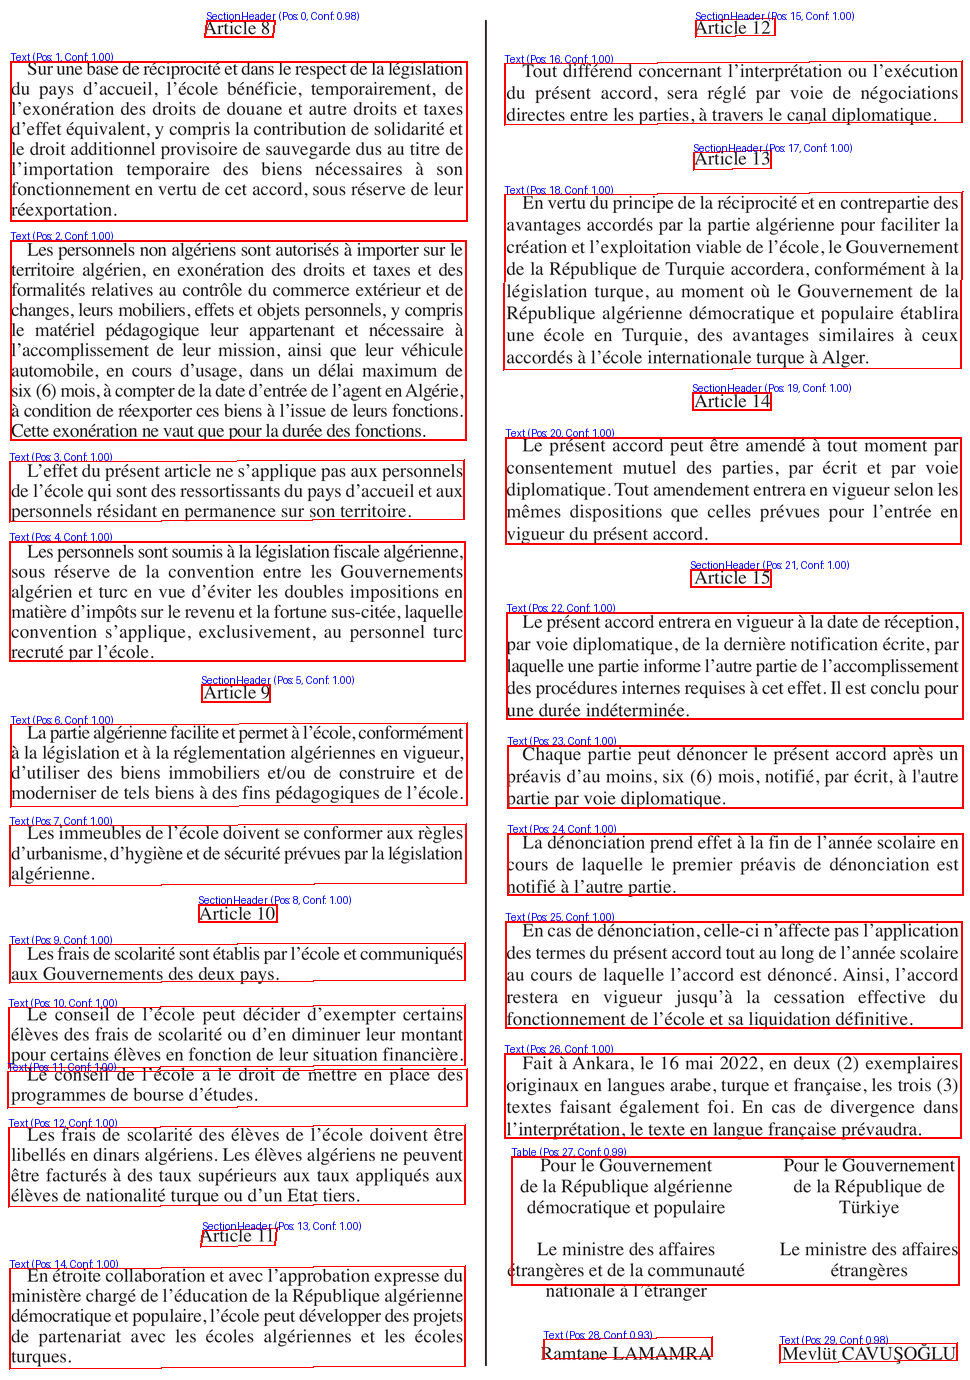

In [15]:
imageTest.draw_order_layout_on_image()

In [13]:
imageTest.draw_text_on_image()

AttributeError: 'TextLine' object has no attribute 'label'